# 배치정규화를 사용할 때와 사용하지 않았을 때의 차이 실험 (텐써 플로우)

## 배치정규화를 사용하지 않았을 경우

In [1]:


# 0. 필요한 패키지 가져오는 코드 

import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써플로우에 내장되어있는 
                                                                         # mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense  # 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈

tf.random.set_seed(777)



In [2]:

# 1. 필기체 데이터를 불러옵니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')  # mnist 데이터 로드
    
# 2. 정규화 진행  
x_train = (x_train.reshape((60000, 28 * 28))) / 255 
x_test = (x_test.reshape((10000, 28 * 28))) / 255

# 3. 정답 데이터를 준비한다. 

# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 



11501568/11490434 [==============================] - 0s 0us/step


In [3]:

# 4. 모델을 구성합니다. 2층 신경망으로 구성

model = Sequential()
model.add(Dense(50, activation = 'sigmoid', input_shape = (784, )))  # 1층
model.add(Dense(50, activation = 'sigmoid'))  # 2층
model.add(Dense(10, activation = 'softmax'))  # 3층 출력층 



In [4]:

# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )

model.compile(optimizer='SGD',                # 경사하강법의 종류를 확률적 경사하강법으로 지정
              loss = 'categorical_crossentropy',    # 분류의 오차함수
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 


In [ ]:

#6. 모델을 훈련시킵니다. 

history = model.fit(x_train, y_train, 
                    epochs = 30,  # 30에폭
                    batch_size = 100,
                    validation_data =(x_test, y_test))


In [6]:

# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

model.evaluate(x_test, y_test)



313/313 [==============================] - 1s 2ms/step - loss: 0.3982 - acc: 0.8894


[0.3981786072254181, 0.8894000053405762]

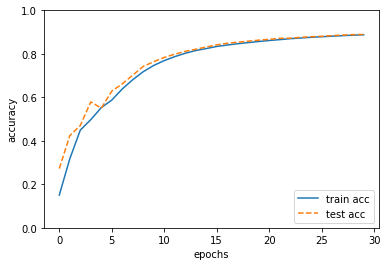

In [8]:
# 시각화
import numpy as np

train_acc_list=history.history['acc']
train_acc_list

test_acc_list=history.history['val_acc']
test_acc_list

import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


# 결과
# 훈련데이터 :   0.8875     / 테스트 데이터 : 0.8894

## 배치정규화 사용했을 경우

In [9]:
from tensorflow.keras.layers import Dense, BatchNormalization    # 완전 연결계층을 구성하기 위한 모듈

# 4. 모델을 구성합니다. 2층 신경망으로 구성

model2 = Sequential()
model2.add(Dense(50, activation = 'sigmoid', input_shape = (784, )))  # 1층
model2.add( BatchNormalization() )
model2.add(Dense(50, activation = 'sigmoid'))  # 2층
model2.add( BatchNormalization() )
model2.add(Dense(10, activation = 'softmax'))  # 3층 출력층 


In [10]:

# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )

model2.compile(optimizer='SGD',                # 경사하강법의 종류를 확률적 경사하강법으로 지정
              loss = 'categorical_crossentropy',    # 분류의 오차함수
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 

In [ ]:
#6. 모델을 훈련시킵니다. 

history = model2.fit(x_train, y_train, 
                    epochs = 30,  # 30에폭
                    batch_size = 100,
                    validation_data =(x_test, y_test))

In [12]:
# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1490 - acc: 0.9570


[0.14904393255710602, 0.9570000171661377]

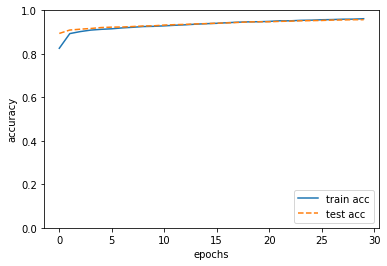

In [13]:
#시각화
train_acc_list=history.history['acc']
train_acc_list

test_acc_list=history.history['val_acc']
test_acc_list

import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [ ]:
# 결과

# 배치정규화를 진행하지 않은 경우 정확도 : 0.8894

# 배치정규화를 진행했을 경우 정확도 : 0.9570 

# 배치정규화를 진행했을 때 정확도가 높게 나타났다.

# Dropout & Earlystopping 기능 구현하기

## Dropout 구현하기

In [14]:
# 텐써플로우에서 드롭아웃 지정하기 (20% 의 뉴런을 랜덤으로 삭제하고 실험)

from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# 4. 모델을 구성합니다. 2층 신경망으로 구성

model3 = Sequential()
model3.add(Dense(50, activation = 'relu', input_shape = (784, )))  # 1층
model3.add( BatchNormalization() )
model3.add( Dropout(0.2) )
model3.add(Dense(50, activation = 'relu'))  # 2층
model3.add( BatchNormalization() )
model3.add( Dropout(0.2) )
model3.add(Dense(10, activation = 'softmax'))  # 3층 출력층 


# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )

model3.compile(optimizer='SGD',                # 경사하강법의 종류를 확률적 경사하강법으로 지정
              loss = 'categorical_crossentropy',    # 분류의 오차함수
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 

In [ ]:
#6. 모델을 훈련시킵니다. 

history = model3.fit(x_train, y_train, 
                    epochs = 30,  # 30에폭
                    batch_size = 100,
                    validation_data =(x_test, y_test))

In [16]:
# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - acc: 0.9663


[0.105034738779068, 0.9663000106811523]

0.9557999968528748
0.9663000106811523


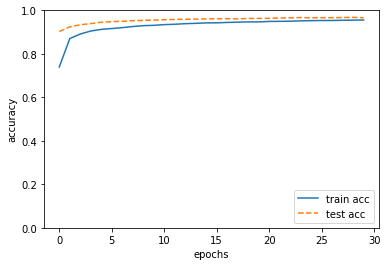

In [18]:
#시각화
train_acc_list=history.history['acc']
print(train_acc_list[-1])

test_acc_list=history.history['val_acc']
print(test_acc_list[-1])

import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Earlystopping 구현하기

In [20]:
# 얼리스탑 기능 코드
from tensorflow.keras.callbacks import EarlyStopping

#콜백을 정의합니다.

callbacks = [ EarlyStopping( monitor = 'val_acc', patience = 3 , verbose = 1 ) ]



* 설명
  * monitor : 관찰하고자 하는 항목으로 'val_loss'나 'val_acc' 를 주로 사용합니다.
  * patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에폭을 얼마나 기다려 줄건지를 지정하는데 10을 준다면 개선이 없는 에폭을 10번 지속될 경우 학습을 종료하겠다.
  * verbose : 얼마나 자세하게 정보를 표현 할 것인가를 지정( 0, 1, 2 )

In [21]:
# 6. 모델을 훈련시킵니다. 

history = model3.fit(x_train, y_train, 
                    epochs = 30,  # 30에폭
                    batch_size = 100,
                    validation_data =(x_test, y_test),
                    callbacks = callbacks)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1416 - acc: 0.9571 - val_loss: 0.1035 - val_acc: 0.9679
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1395 - acc: 0.9573 - val_loss: 0.1028 - val_acc: 0.9674
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1412 - acc: 0.9572 - val_loss: 0.1035 - val_acc: 0.9677
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1391 - acc: 0.9573 - val_loss: 0.1019 - val_acc: 0.9687
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1377 - acc: 0.9573 - val_loss: 0.1035 - val_acc: 0.9684
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1354 - acc: 0.9591 - val_loss: 0.0999 - val_acc: 0.9689
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1330 - acc: 0.9592 - val_loss: 0.1019 - val_acc: 0.9688
Epoch 8/30
600/600 [==============================] - 2s 4ms/step - loss: 0.

- Epoch 23/30
- 600/600 [==============================] - 2s 4ms/step - loss: 0.1160 - acc: 0.9642 - val_loss: 0.0941 - val_acc: 0.9707
- Epoch 00023: early stopping

훈련데이터의 정확도가 테스트 데이터의 정확도를 역전하는 그 시점(23에폭)에서 조기종료 했습니다.